In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./input\heart-attack-analysis-prediction-dataset\heart.csv
./input\restaurant-scores-san-francisco\Restaurant_Scores_-_LIVES_Standard.csv
./input\stroke-prediction-dataset\healthcare-dataset-stroke-data.csv


# Source of Dataset
### [Restaurant Scores - LIVES Standard](https://catalog.data.gov/dataset/restaurant-scores-lives-standard)

# Preparation and Analysis of Data

### **Let's view a sample portion of the dataset**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv("./input/restaurant-scores-san-francisco/Restaurant_Scores_-_LIVES_Standard.csv")
#Convert to DateTime
df["inspection_date"]=pd.to_datetime(df["inspection_date"])
#Drop unnecessary columns
df = df.drop(["Analysis Neighborhoods","Current Supervisor Districts","Current Police Districts","SF Find Neighborhoods","Neighborhoods","business_phone_number"],axis=1)
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,POINT (-122.410513 37.797223),835_20180917,2018-09-17,88.0,Routine - Unscheduled,835_20180917_103139,Improper food storage,Low Risk
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,POINT (-122.404033 37.790477),905_20190415,2019-04-15,87.0,Routine - Unscheduled,905_20190415_103114,High risk vermin infestation,High Risk
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,POINT (-122.46659 37.780834),1203_20170803,2017-08-03,77.0,Routine - Unscheduled,1203_20170803_103120,Moderate risk food holding temperature,Moderate Risk
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,37.790683,-122.420264,POINT (-122.420264 37.790683),1345_20170928,2017-09-28,81.0,Routine - Unscheduled,1345_20170928_103105,Improper cooling methods,High Risk
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,POINT (-122.434935 37.760954),1352_20180620,2018-06-20,74.0,Routine - Unscheduled,1352_20180620_103177,Non service animal,Low Risk


In [3]:
#Consolidate Inspection Types
df=df.replace(to_replace =['Routine - Unscheduled', 'Reinspection/Followup', 'Routine - Scheduled'], value='Routine')
df=df.replace(to_replace =['New Construction', 'New Ownership', 'New Ownership - Followup'], value='New')
df=df.replace(to_replace =['Structural Inspection', 'Non-inspection site visit', 'Foodborne Illness Investigation', 'Special Event', 'Multi-agency Investigation', 'Administrative or Document Review', 'Community Health Assessment'], value='Investigation')
df=df.replace(to_replace =['Complaint', 'Complaint Reinspection/Followup'], value='Complaint')

In [4]:
#Consolidate Risk Magnitude
df['risk_category'] = df['risk_category'].replace({'Low Risk':1, 'Moderate Risk':2, 'High Risk':3}) 

In [5]:
#Consolidate Types of Violation
hygiene_v = dict.fromkeys(['Unclean or degraded floors walls or ceilings', 'Wiping cloths not clean or properly stored or inadequate sanitizer', 'Moderate risk vermin infestation', 'Unclean nonfood contact surfaces', 'Foods not protected from contamination', 'Unclean hands or improper use of gloves', 'High risk vermin infestation', 'Inadequately cleaned or sanitized food contact surfaces', 'Low risk vermin infestation', 'Unclean or unsanitary food contact surfaces', 'Employee eating or smoking', 'Contaminated or adulterated food', 'Unsanitary employee garments hair or nails', 'Other low risk violation', 'Unclean unmaintained or improperly constructed toilet facilities', 'Other moderate risk violation', 'Sewage or wastewater contamination', 'Food in poor condition', 'Other high risk violation', 'Reservice of previously served foods', 'Discharge from employee nose mouth or eye', 'Improperly washed fruits and vegetables'], 'Hygiene')
infralack_v = dict.fromkeys(['Inadequate and inaccessible handwashing facilities', 'Inadequate or unsanitary refuse containers or area or no garbage service', 'No thermometers or uncalibrated thermometers', 'Improper or defective plumbing', 'No hot water or running water', 'Inadequate ventilation or lighting', 'Inadequate warewashing facilities or equipment', 'Inadequate sewage or wastewater disposal', 'Insufficient hot water or running water',"Mobile food facility with unapproved operating conditions","No restroom facility within 200 feet of mobile food facility"],'Lack Infrastructure')
legal_v = dict.fromkeys(['Food safety certificate or food handler card not available', 'Unapproved or unmaintained equipment or utensils', 'Permit license or inspection report not posted', 'No plan review or Building Permit', 'Unapproved  living quarters in food facility', 'Unpermitted food facility', 'Unapproved food source', 'Mobile food facility stored in unapproved location', 'Mobile food facility not operating with an approved commissary',"Improperly displayed mobile food permit or signage"],'Legal')
noncompliance_v = dict.fromkeys(['High risk food holding temperature', 'Inadequate food safety knowledge or lack of certified food safety manager', 'Improper storage of equipment utensils or linens', 'Improper food storage', 'Improper thawing methods', 'Moderate risk food holding temperature', 'Improper cooling methods', 'Improper storage use or identification of toxic substances', 'Improper food labeling or menu misrepresentation', 'Non service animal', 'Noncompliance with shell fish tags or display', 'Noncompliance with HAACP plan or variance', 'Inadequate HACCP plan record keeping', 'Inadequate dressing rooms or improper storage of personal items', 'Improper reheating of food', 'Inadequate procedures or records for time as a public health control', 'Worker safety hazards', 'No person in charge of food facility', 'Improper cooking time or temperatures', 'Unauthorized or unsafe use of time as a public health control measure', 'Consumer advisory not provided for raw or undercooked foods', 'Noncompliance with Gulf Coast oyster regulation', 'Noncompliance with Cottage Food Operation'],'Noncompliance')
df = df.replace(hygiene_v)
df = df.replace(infralack_v)
df = df.replace(legal_v)
df = df.replace(noncompliance_v)

### Now that our data is ready,

# 1. Let's Observe the Inspection Details

### **From the dataset, we have consolidated below fields:** 
#### * **Inspection Types**   have been categorized to Routine, Investigation, Complaint, New
#### * **Violation Types**    have been categorized to Hygiene, Lack Infrastructure, Legal, Non Compliance
#### * **Risk Types**         have been categorized to High Risk, Medium Risk, Low Risk

-------------------------------------------------------------------------------------------------------------------------------
### Demostration:

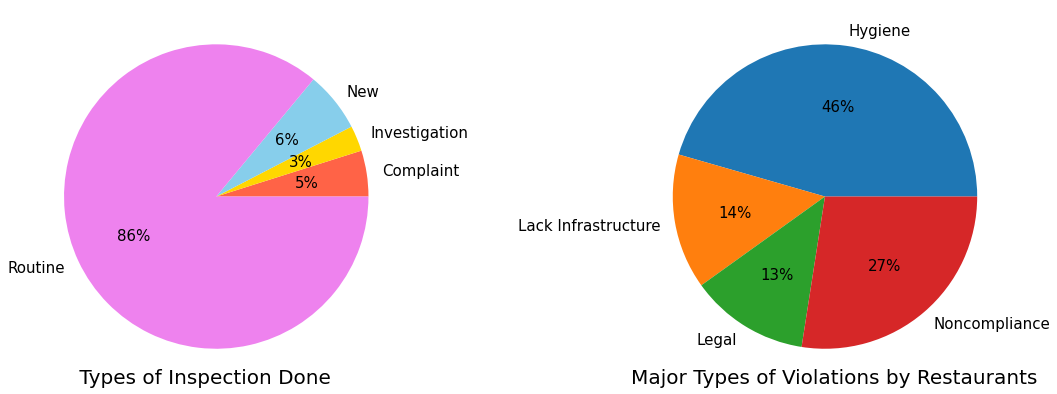

In [6]:
def label_function(val):
    return f'{val:.0f}%'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
df.groupby("inspection_type").size().plot(kind="pie",autopct=label_function,textprops={"fontsize":15},colors=["tomato","gold","skyblue","violet"],ax=ax1)
axh1=ax1.set_ylabel("         Types of Inspection Done",size=20,loc="bottom")
df.groupby("violation_description").size().plot(kind="pie",autopct=label_function,textprops={"fontsize":15},ax=ax2)
axh2=ax2.set_ylabel("Major Types of Violations by Restaurants",size=20,loc="bottom")
axh1.set_rotation(0)
axh2.set_rotation(0)

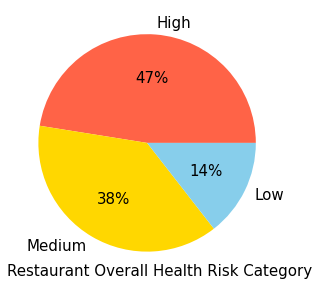

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
df.groupby("risk_category").size().plot(kind="pie",autopct=label_function,textprops={"fontsize":15},colors=["tomato","gold","skyblue"],labels=["High","Medium","Low"],ax=ax)
axh=ax.set_ylabel("Restaurant Overall Health Risk Category",size=15,loc="bottom")
axh.set_rotation(0)



### From above demostration it is clear that majority of *inspections are done routinely*. And most common type of *violation done by restaurant owners is hygiene*.

# 2. Lets visualize Location of Restaurants in San Francisco
### Will first clear outliers and then use JointPlot for better understanding

In [8]:
newdf= df[df['business_latitude'] != 0]
newdf= newdf[newdf['business_longitude'] != 0]

#### **Inspection**

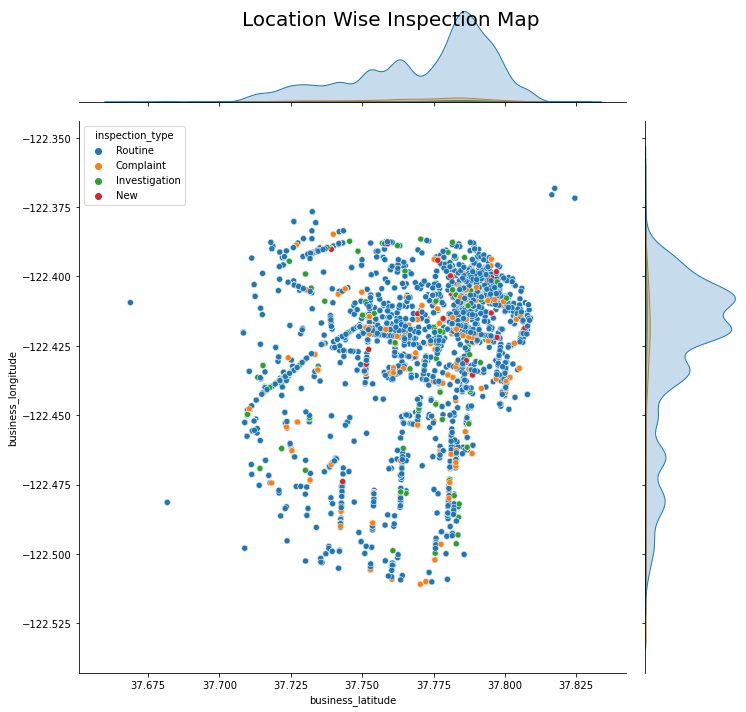

In [9]:
ax = sns.jointplot(x="business_latitude", y="business_longitude",data=newdf, size=10,hue="inspection_type");
sns.despine
ax.fig.suptitle("Location Wise Inspection Map",fontsize=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

#### **Violation**

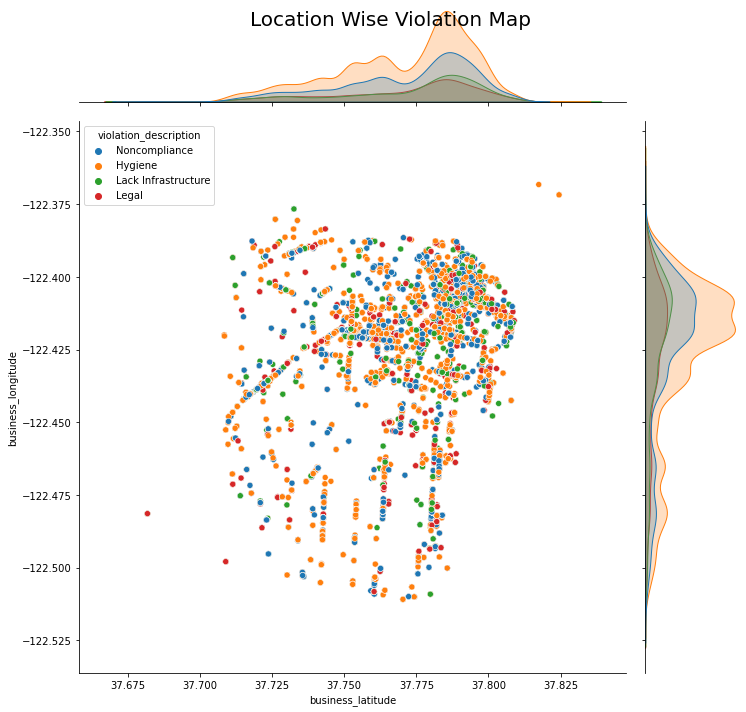

In [10]:
ax = sns.jointplot(x="business_latitude", y="business_longitude",data=newdf, size=10,hue="violation_description");
sns.despine
ax.fig.suptitle("Location Wise Violation Map",fontsize=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

#### **Health Risk**

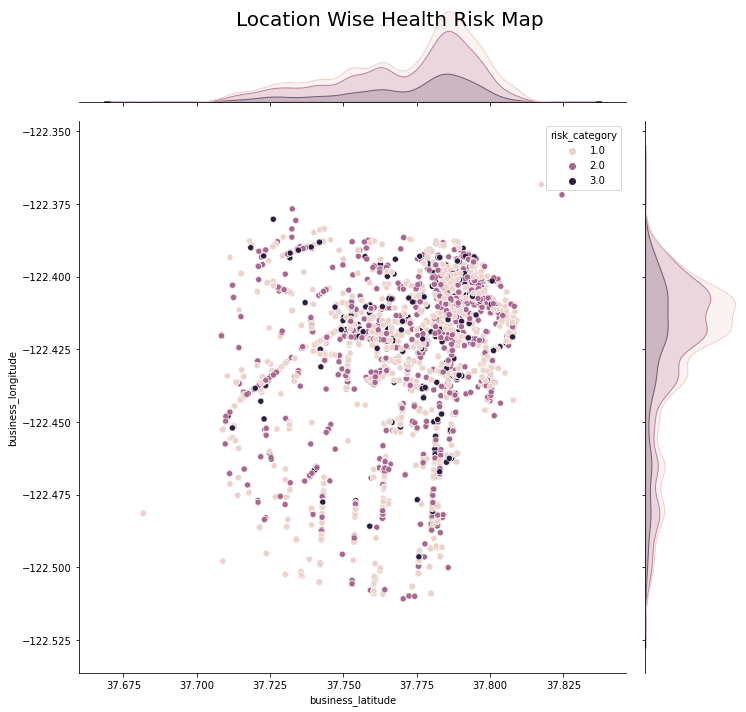

In [11]:
ax = sns.jointplot(x="business_latitude", y="business_longitude",data=newdf, size=10,hue="risk_category");
sns.despine
ax.fig.suptitle("Location Wise Health Risk Map",fontsize=20)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

# 3. Time Series of Inspection Score

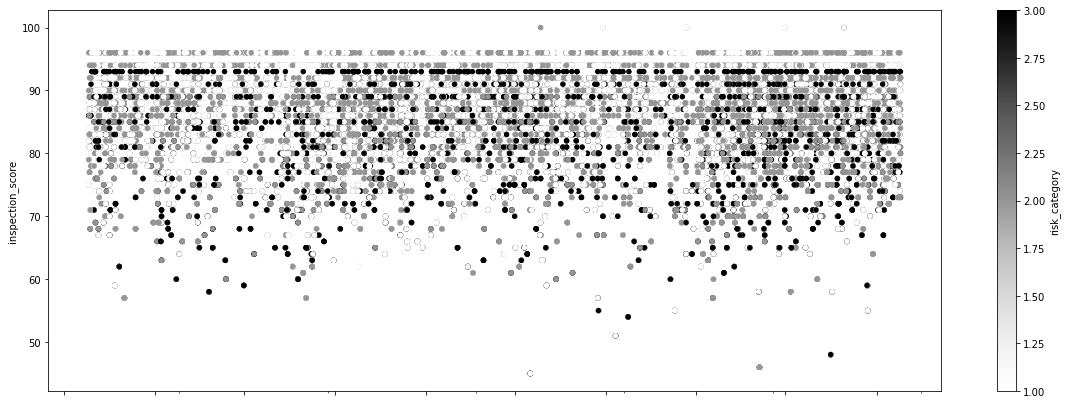

In [12]:
ax=df.plot(x="inspection_date",y="inspection_score",kind="scatter",figsize=(20,7),c="risk_category")

### Thank you so much for viewing.